In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dropout 
import tensorflow as tf
import random as rn

Using TensorFlow backend.


In [4]:
def assign_label(img,d_type):
    return d_type

In [5]:
from skimage import data
from skimage.color import rgb2gray
def make_train_data(DIR):
    for img in os.listdir(DIR):
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        img = rgb2gray(img)
        ret, b_img = cv2.threshold(img,.4,1,cv2.THRESH_BINARY)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        X.append(np.array(b_img))
        Z.append(str(label))
    plt.imshow(b_img)

In [6]:
X=[]
Z=[]
IMG_SIZE=50
NORMAL_DIR='/Users/user/Desktop/x-ray/train/NORMAL'
PNEUMONIA_DIR='/Users/user/Desktop/x-ray/train/PNEUMONIA'

In [7]:
print(os.listdir('/Users/user/Desktop/x-ray/train'))

['NORMAL', 'PNEUMONIA']


5


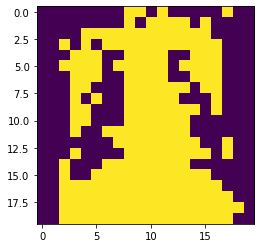

In [8]:
make_train_data('NORMAL',NORMAL_DIR)
print(len(X))

10


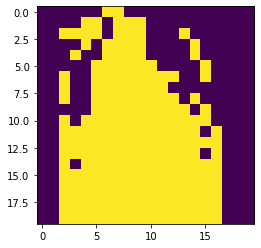

In [9]:
make_train_data('malignant',PNEUMONIA_DIR)
print(len(X))

In [10]:
X=np.array(X)
X.shape

(10, 20, 20)

In [11]:
X1=X.reshape(X.shape[0],X.shape[1]*X.shape[2])

In [12]:
le=LabelEncoder()
Y=le.fit_transform(Z)
s=set(Z)
l=[]
for i in s:
    l.append(i)
cheak1=le.fit_transform(l)
cheak2=to_categorical(cheak1,2)
Y=to_categorical(Y,2)

In [13]:
print(cheak2)
print(cheak1)
print(l)

[[0. 1.]
 [1. 0.]]
[1 0]
['malignant', 'NORMAL']


In [14]:
w,h=28819,10
Matrix = [[0 for x in range(w)] for y in range(h)]
import csv

with open('protein.txt', 'r') as csvFile:
    reader = csv.reader(csvFile)
    y=0   
    for row in reader:
        x=0
        for x in range (h):
            Matrix[x][y]=row[x]
            print(Matrix[x][y])
            x=x+1
        y=y+1

csvFile.close()

IndexError: list index out of range

In [15]:
from skimage import color
from skimage import io

In [16]:
import numpy as np
from ripser import ripser
from persim import plot_diagrams

In [17]:
import gudhi

In [18]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import PIL
from persim import plot_diagrams
from ripser import ripser, lower_star_img
import csv
import math
import warnings
import random
import copy
from random import seed
from random import randint
seed(1)
def betti_nums(data, eps ):
    l1=[]   
    for i in range(20):
        for j in range(20): 
             if data[i][j] == 1:
                x = randint(0, 20)
                l1.append([i,j,x])
    if len(l1) == 0:
            return (0,0,0)
    l1=np.array(l1)
    diagrams = ripser(l1, maxdim = 2,distance_matrix=False, metric = 'euclidean',thresh =10)['dgms']
    b=[]
    c=0
    for j in range(len(diagrams[0])):
        if(diagrams[0][j][1]==float('inf')):
            c+=1
    b0=c
    c=0
    for j in range(len(diagrams[1])):
        if(diagrams[1][j][1]==float('inf')):
            c+=1
    b1=c   
    c=0
    for j in range(len(diagrams[2])):
        if(diagrams[2][j][1]==float('inf')):
            c+=1
    b2=c
    b.append(b0)
    b.append(b1)
    b.append(b2)
    return b
    
        
def classificationVector(dataSet):
        totalDataVect = []
        j = 0 
        l= dataSet[j] 
        while j != len(dataSet):  
            print(j)
            dataVect=[]   
            s = betti_nums(l,eps =1.42)
            totalDataVect.append(s)
            j += 1
        return totalDataVect

In [19]:

import numpy as np
import math
import random
import gudhi
from sklearn.neighbors import KDTree
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



In [20]:
X4= classificationVector(X)

0
1
2
3
4
5
6
7
8
9


In [51]:
print(X4)

[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0]]


In [21]:
def DTM(X,query_pts,m):
    N_tot = X.shape[0]     
    k = math.floor(m*N_tot)+1   # number of neighbors
    kdt = KDTree(X, leaf_size=30, metric='euclidean')
    NN_Dist, NN = kdt.query(query_pts, k, return_distance=True)  
    DTM_result = np.sqrt(np.sum(NN_Dist*NN_Dist,axis=1) / k)
    return(DTM_result)
def Filtration_value(p, fx, fy, d, n = 10):
    if p==np.inf:
        value = max([fx,fy,d/2])
    else:
        fmax = max([fx,fy])
        if d < (abs(fx**p-fy**p))**(1/p):
            value = fmax
        elif p==1:
            value = (fx+fy+d)/2
        elif p==2:
            value = np.sqrt( ( (fx+fy)**2 +d**2 )*( (fx-fy)**2 +d**2 ) )/(2*d)            
        else:
            Imin = fmax; Imax = (d**p+fmax**p)**(1/p)
            for i in range(n):
                I = (Imin+Imax)/2
                g = (I**p-fx**p)**(1/p)+(I**p-fy**p)**(1/p)
                if g<d:
                    Imin=I
                else:
                    Imax=I
            value = I
    return value
def WeightedRipsFiltration(X, F, p, dimension_max , filtration_max):
    N_tot = X.shape[0]     
    distances = euclidean_distances(X)         
    st = gudhi.SimplexTree()                    

    for i in range(N_tot):                  
        value = F[i]
        if value<filtration_max:
            st.insert([i], filtration = F[i])            
    for i in range(N_tot):                  
        for j in range(i):
            value = Filtration_value(p, F[i], F[j], distances[i][j])
            if value<filtration_max:
                st.insert([i,j], filtration  = value)
    
    st.expansion(dimension_max)                
 
    result_str = 'Weighted Rips Complex is of dimension ' + repr(st.dimension()) + ' - ' + \
        repr(st.num_simplices()) + ' simplices - ' + \
        repr(st.num_vertices()) + ' vertices.' +\
        ' Filtration maximal value is ' + str(filtration_max) + '.'
    print(result_str)

    return st
def DTMFiltration(X, m, p, dimension_max, filtration_max = np.inf):
    
    DTM_values = DTM(X,X,m)
    st = WeightedRipsFiltration(X, DTM_values, p, dimension_max, filtration_max)
    return st
def AlphaWeightedRipsFiltration(X, F, p,dimension_max, filtration_max = np.inf):
    N_tot = X.shape[0]     
    distances = euclidean_distances(X)          #compute the pairwise distances

    st_alpha = gudhi.AlphaComplex(points=X).create_simplex_tree()    
    st = gudhi.SimplexTree()                   #create an empty simplex tree
    
    for simplex in st_alpha.get_skeleton(2):            #add vertices with corresponding filtration value
        if len(simplex[0])==1:
            i = simplex[0][0]
            st.insert([i], filtration  = F[i])
        if len(simplex[0])==2:                     #add edges with corresponding filtration value
            i = simplex[0][0]
            j = simplex[0][1]
            value = Filtration_value(p, F[i], F[j], distances[i][j])
            st.insert([i,j], filtration  = value)

    st.expansion(dimension_max)                 #expand the complex

    result_str = 'Alpha Weighted Rips Complex is of dimension ' + repr(st.dimension()) + ' - ' + \
        repr(st.num_simplices()) + ' simplices - ' + \
        repr(st.num_vertices()) + ' vertices.' +\
        ' Filtration maximal value is ' + str(filtration_max) + '.'
    print(result_str)

    return st
def AlphaDTMFiltration(X, m, p, dimension_max, filtration_max = np.inf):
    DTM_values = DTM(X,X,m)
    st = AlphaWeightedRipsFiltration(X, DTM_values, p, dimension_max, filtration_max)
    return st

In [26]:
for k in range(10):
 l1=[]   
 for i in range(10):
     for j in range(10): 
         if X[k][i][j] == 1:
                x = randint(0,100)
                l1.append([i,j,x])
 l1=np.array(l1)

 p ,m=.9,.1                              
 dimension_max = 3                       
 st_DTM = DTMFiltration(l1, m, p, dimension_max) 
 diagram_DTM = st_DTM.persistence()  
 st_alpha = gudhi.AlphaComplex(points=l1).create_simplex_tree()  
 diagram_alpha = st_alpha.persistence()  
 b1,b2,b3=0,0,0;
 for i in range(len(diagram_DTM)):
        if(diagram_DTM[i][0]==2):
            if(diagram_DTM[i][1][1]-diagram_DTM[i][1][0]>.1):
                b1+=1
        if(diagram_DTM[i][0]==1):
            if(diagram_DTM[i][1][1]-diagram_DTM[i][1][0]>.1):
                b2+=1
        if(diagram_DTM[i][0]==0):
            if(diagram_DTM[i][1][1]-diagram_DTM[i][1][0]>.1):
                b3+=1
 print(k)
 if(b1!=0):
  X4[k].append(b1)
 if(b2!=0):
  X4[k].append(b2)
 if(b3!=0):
  X4[k].append(b3)
 b1,b2,b3=0,0,0;
 for i in range(len(diagram_alpha)):
        if(diagram_alpha[i][0]==2):
            if(diagram_alpha[i][1][1]-diagram_alpha[i][1][0]>.1):
                b1+=1
        if(diagram_alpha[i][0]==1):
            if(diagram_alpha[i][1][1]-diagram_alpha[i][1][0]>.1):
                b2+=1
        if(diagram_alpha[i][0]==0):
            if(diagram_alpha[i][1][1]-diagram_alpha[i][1][0]>.1):
                b3+=1
 if(b1!=0):
  X4[k].append(b1)
 if(b2!=0):
  X4[k].append(b2)
 if(b3!=0):
  X4[k].append(b3)
                

Weighted Rips Complex is of dimension 3 - 866847 simplices - 68 vertices. Filtration maximal value is inf.
0
Weighted Rips Complex is of dimension 3 - 179446 simplices - 46 vertices. Filtration maximal value is inf.
1
Weighted Rips Complex is of dimension 3 - 396606 simplices - 56 vertices. Filtration maximal value is inf.
2
Weighted Rips Complex is of dimension 3 - 1429428 simplices - 77 vertices. Filtration maximal value is inf.
3
Weighted Rips Complex is of dimension 3 - 149985 simplices - 44 vertices. Filtration maximal value is inf.
4
Weighted Rips Complex is of dimension 3 - 559736 simplices - 61 vertices. Filtration maximal value is inf.
5
Weighted Rips Complex is of dimension 3 - 1091058 simplices - 72 vertices. Filtration maximal value is inf.
6
Weighted Rips Complex is of dimension 3 - 294203 simplices - 52 vertices. Filtration maximal value is inf.
7
Weighted Rips Complex is of dimension 3 - 82992 simplices - 38 vertices. Filtration maximal value is inf.
8
Weighted Rips Comp

In [56]:
print(diagram_alpha)

[(2, (12.022727272727273, 12.750000000000002)), (2, (6.483576642335766, 6.7515378700499795)), (2, (11.761363636363647, 11.91796874999992)), (2, (31.0622119815668, 31.20161290322608)), (2, (7.80769230769231, 7.882154006243507)), (2, (5.312500000000009, 5.375)), (2, (7.409999999999998, 7.460400000000009)), (2, (4.56611570247934, 4.584710743801637)), (2, (22.74131274131275, 22.7416716240333)), (1, (6.5, 13.769607843137255)), (1, (14.0, 18.13369397217929)), (1, (14.5, 18.02828886844526)), (1, (8.5, 11.671641791044777)), (1, (14.25, 16.669811320754718)), (1, (11.0, 13.384955752212388)), (1, (10.5, 12.127556512378895)), (1, (4.5, 6.000000000000007)), (1, (5.25, 6.681818181818182)), (1, (8.5, 9.87096774193548)), (1, (7.5, 8.823529411764719)), (1, (6.0, 7.156626506024095)), (1, (29.25, 30.40322580645163)), (1, (4.25, 5.351851851851851)), (1, (5.25, 6.282608695652174)), (1, (8.75, 9.708904109589067)), (1, (10.25, 11.179178470254968)), (1, (4.25, 5.160714285714274)), (1, (10.75, 11.6365979381443

In [58]:
diagram_DTM=np.array(diagram_DTM)
print(X4)

[[1, 0, 0, 1, 68, 1, 68, 6, 68, 9, 58, 68], [1, 0, 0, 1, 46, 3, 46, 1, 46, 30, 46], [1, 0, 0, 1, 56, 4, 56, 2, 56, 7, 43, 56], [1, 0, 0, 4, 77, 7, 77, 4, 77, 9, 67, 77], [1, 0, 0, 3, 44, 2, 44, 2, 44, 3, 30, 44], [1, 0, 0, 2, 61, 3, 61, 1, 61, 4, 47, 61], [1, 0, 0, 3, 72, 1, 72, 1, 6, 72, 12, 65, 72], [1, 0, 0, 1, 52, 2, 52, 2, 52, 3, 31, 52], [1, 0, 0, 38, 2, 38, 2, 38, 3, 20, 38], [1, 0, 0, 2, 52, 3, 52, 2, 52, 2, 32, 52]]


In [59]:
YZ=[]
for i in Y:
    if i[0]==1:
        YZ.append(0)
    else:
        YZ.append(1)

In [60]:
x_train,x_test,y_train,y_test=train_test_split(X4,YZ,test_size=0.25,random_state=42)

In [61]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train,y_train)

ValueError: setting an array element with a sequence.

In [43]:
y_pred = svclassifier.predict(x_test)
print(y_pred)

[0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1
 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0
 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1
 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1
 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1
 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0]


In [342]:
correct=0
incorrect=0
for i in range(len(y_pred)):
    if(y_pred[i]==y_test[i]):
        correct+=1
    else:
        incorrect+=1
print(correct)
print(incorrect)

147
103


In [263]:
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential
from keras.layers import Dropout, Flatten,Activation
image_size =9
num_classes = 2 

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.


model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Dense(units=num_classes, activation='softmax'))

In [264]:
batch_size=128
epochs=100

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [265]:
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)
model.summary()
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=100,validation_data = (x_test,y_test),
                              verbose = 1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                320       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
activation_7 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               16896     
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)              

Epoch 37/100
750/750 [==============================] - ETA: 0s - loss: 0.6230 - accuracy: 0.66 - 0s 75us/step - loss: 0.6368 - accuracy: 0.6360 - val_loss: 0.6281 - val_accuracy: 0.6520
Epoch 38/100
750/750 [==============================] - ETA: 0s - loss: 0.6703 - accuracy: 0.61 - 0s 69us/step - loss: 0.6221 - accuracy: 0.6747 - val_loss: 0.6285 - val_accuracy: 0.6560
Epoch 39/100
750/750 [==============================] - ETA: 0s - loss: 0.6265 - accuracy: 0.64 - 0s 69us/step - loss: 0.6437 - accuracy: 0.6533 - val_loss: 0.6300 - val_accuracy: 0.6520
Epoch 40/100
750/750 [==============================] - ETA: 0s - loss: 0.6371 - accuracy: 0.64 - 0s 64us/step - loss: 0.6427 - accuracy: 0.6520 - val_loss: 0.6264 - val_accuracy: 0.6640
Epoch 41/100
750/750 [==============================] - ETA: 0s - loss: 0.5986 - accuracy: 0.69 - 0s 64us/step - loss: 0.6292 - accuracy: 0.6547 - val_loss: 0.6361 - val_accuracy: 0.6560
Epoch 42/100
750/750 [==============================] - ETA: 0s -

Epoch 81/100
750/750 [==============================] - ETA: 0s - loss: 0.5716 - accuracy: 0.67 - 0s 37us/step - loss: 0.6024 - accuracy: 0.6733 - val_loss: 0.6230 - val_accuracy: 0.6760
Epoch 82/100
750/750 [==============================] - ETA: 0s - loss: 0.5987 - accuracy: 0.70 - 0s 37us/step - loss: 0.6181 - accuracy: 0.6733 - val_loss: 0.6214 - val_accuracy: 0.6840
Epoch 83/100
750/750 [==============================] - ETA: 0s - loss: 0.5719 - accuracy: 0.66 - 0s 37us/step - loss: 0.6211 - accuracy: 0.6613 - val_loss: 0.6222 - val_accuracy: 0.6720
Epoch 84/100
750/750 [==============================] - ETA: 0s - loss: 0.6100 - accuracy: 0.66 - 0s 37us/step - loss: 0.6066 - accuracy: 0.6747 - val_loss: 0.6166 - val_accuracy: 0.6560
Epoch 85/100
750/750 [==============================] - ETA: 0s - loss: 0.5790 - accuracy: 0.70 - 0s 37us/step - loss: 0.6190 - accuracy: 0.6680 - val_loss: 0.6194 - val_accuracy: 0.6480
Epoch 86/100
750/750 [==============================] - ETA: 0s -

In [176]:
X=[]
Z=[]
IMG_SIZE=50
bc_malignant_DIR='/Users/user/Desktop/test/malignant'
bc_benign_DIR='/Users/user/Desktop/test/benign'

In [78]:
make_train_data('benign',bc_benign_DIR)
print(len(X))
make_train_data('malignant',bc_malignant_DIR)
print(len(X))

540
1091


In [79]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y1=Y
s=set(Z)
l=[]
for i in s:
    l.append(i)
cheak1=le.fit_transform(l)
Y=to_categorical(Y,2)
X=np.array(X)
X=X/255

In [80]:
X1=[]
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
DIR1='/Users/user/Desktop/test/benign'
DIR2='/Users/user/Desktop/test/malignant'
for img in os.listdir(DIR1):
        path = os.path.join(DIR1,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = color.rgb2gray(img)
        ret, b_img = cv2.threshold(img,.5,1,cv2.THRESH_BINARY)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        X1.append(b_img)
for img in os.listdir(DIR2):
        path = os.path.join(DIR2,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = color.rgb2gray(img)
        ret, b_img = cv2.threshold(img,.5,1,cv2.THRESH_BINARY)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        X1.append(b_img)


In [81]:
X3=[]
for i in range(1000):
    X2=[]
    for j in range(50):
        for k in range(50):
            X2.append(X1[i][j][k])  
    X3.append(X2)

In [82]:
X3=np.array(X3)
print(X3.shape)

(1000, 2500)


In [83]:
x_te= classificationVector(X3,'whole')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
x_te=np.array(x_te)
x_te.shape

In [ ]:
print(x_te[0])

In [86]:
pred=model.predict(x_te)
pred_digits=np.argmax(pred,axis=1)
print(pred_digits)
print(pred)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 

In [87]:
print(Y1.shape)

(1091,)


In [88]:
prop_class=[]
mis_class=[]

for i in range(1000):
    if(Y1[i]==pred_digits[i]):
        prop_class.append(i)

i=0
for i in range(1000):
    if( Y1[i]!=pred_digits[i]):
        mis_class.append(i)

In [89]:
print(len(prop_class))
print(len(mis_class))

598
402
